**Librerías**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## **Revisión de Datos**

In [2]:
path = 'Data/data-even.csv'
data = pd.read_csv(path)

data

,Age,Education,EducationNum,MaritalStatus,Relationship,Gender,CapitalGain,HoursPerWeek
0,39,Bachelors,13,Never-married,Not-in-family,Male,2174,40
1,50,Bachelors,13,Married-civ-spouse,Husband,Male,0,13
2,52,HS-grad,9,Married-civ-spouse,Husband,Male,0,45
3,30,Bachelors,13,Married-civ-spouse,Husband,Male,0,40
4,25,HS-grad,9,Never-married,Own-child,Male,0,35
...,...,...,...,...,...,...,...,...
9860,39,Assoc-acdm,12,Married-civ-spouse,Wife,Female,0,20
9861,65,Prof-school,15,Never-married,Not-in-family,Male,1086,60
9862,43,Some-college,10,Divorced,Other-relative,Female,0,40
9863,43,Some-college,10,Married-civ-spouse,Husband,Male,0,50


In [3]:
data.describe()

,Age,EducationNum,CapitalGain,HoursPerWeek
count,9865.000000,9865.000000,9865.000000,9865.000000
mean,42.686163,10.543031,1511.164420,40.829397
std,14.539611,2.685759,9209.395181,14.543395
min,17.000000,1.000000,0.000000,1.000000
25%,32.000000,9.000000,0.000000,38.000000
50%,42.000000,10.000000,0.000000,40.000000
75%,53.000000,13.000000,0.000000,48.000000
max,90.000000,16.000000,99999.000000,99.000000


In [4]:
print("El cojunto de datos original tiene {} observaciones y {} variables".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos original tiene 9865 observaciones y 8 variables
Las columnas son: ['Age', 'Education', 'EducationNum', 'MaritalStatus', 'Relationship', 'Gender', 'CapitalGain', 'HoursPerWeek']


### **Variables**

- **Age**: edad en años.
- **Education**: nivel de educación.
- **Education Num**: años de educación (versión númerica de **Education**).
- **MaritalStatus**: estado marital.
- **Relationship**: rol familiar.
- **Gender**: género.
- **CapitalGain**: ganancias desde la capital.
- **HoursPerWeek**: horas trabajadas por semana. 

Vista de las primeras cinco filas.

In [5]:
data.head()

,Age,Education,EducationNum,MaritalStatus,Relationship,Gender,CapitalGain,HoursPerWeek
0,39,Bachelors,13,Never-married,Not-in-family,Male,2174,40
1,50,Bachelors,13,Married-civ-spouse,Husband,Male,0,13
2,52,HS-grad,9,Married-civ-spouse,Husband,Male,0,45
3,30,Bachelors,13,Married-civ-spouse,Husband,Male,0,40
4,25,HS-grad,9,Never-married,Own-child,Male,0,35


- **¿Hay filas innecesarias?**

Verificamos si existen filas duplicadas en el conjunto de datos.

In [6]:
duplicados = data[data.duplicated()]
print(f"Número de filas duplicadas: {len(duplicados)}")
#print(duplicados)

Número de filas duplicadas: 2810


Como existen datos duplicados entonces eliminamos esas filas, excepto la primer ocurrencia que encontremos. 

In [7]:
data = data.drop_duplicates(keep='first')

- **Tipo de dato de las columnas**

In [8]:
print("Tipo de datos por cada columna:\n{}".format(data.dtypes))

Tipo de datos por cada columna:
Age               int64
Education        object
EducationNum      int64
MaritalStatus    object
Relationship     object
Gender           object
CapitalGain       int64
HoursPerWeek      int64
dtype: object


La columna de **'Education'** ya tiene una equivalencia numérica en la columna **'EducationNum'**, por lo tanto sería redundante convertir esa columna categórica a una númerica.

In [9]:
data.drop(data.columns[1], inplace=True, axis=1)
print("El cojunto de datos ahora tiene {} observaciones y {} columnas".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos ahora tiene 7055 observaciones y 7 columnas
Las columnas son: ['Age', 'EducationNum', 'MaritalStatus', 'Relationship', 'Gender', 'CapitalGain', 'HoursPerWeek']


C:\Users\OMEN\AppData\Local\Temp\ipykernel_20948\3952138140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.columns[1], inplace=True, axis=1)


- **¿Hay valores vacíos en la hoja de datos?**

In [10]:
print("Valores faltantes en cada columna:\n{}".format(data.isnull().sum()))

Valores faltantes en cada columna:
Age              0
EducationNum     0
MaritalStatus    0
Relationship     0
Gender           0
CapitalGain      0
HoursPerWeek     0
dtype: int64


Notamos que no hay variables faltantes en el conjunto de datos, lo cual es excelente ya que no necesitamos modificarlo.

- **Tipo de datos por columna**

In [11]:
print("Tipo de datos por cada columna:\n{}".format(data.dtypes))

Tipo de datos por cada columna:
Age               int64
EducationNum      int64
MaritalStatus    object
Relationship     object
Gender           object
CapitalGain       int64
HoursPerWeek      int64
dtype: object


Existen:
- 4 variables númericas (todas con valores enteros)
- 3 variables categóricas.

### **Análisis de Variables Categóricas**

In [12]:
print("Valores de cada columna categórica:")
for columna in data.select_dtypes(include=[object]):
    print(columna, ":", data[columna].unique())

Valores de cada columna categórica:
MaritalStatus : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Widowed' ' Married-AF-spouse']
Relationship : [' Not-in-family' ' Husband' ' Own-child' ' Unmarried' ' Wife'
 ' Other-relative']
Gender : [' Male' ' Female']


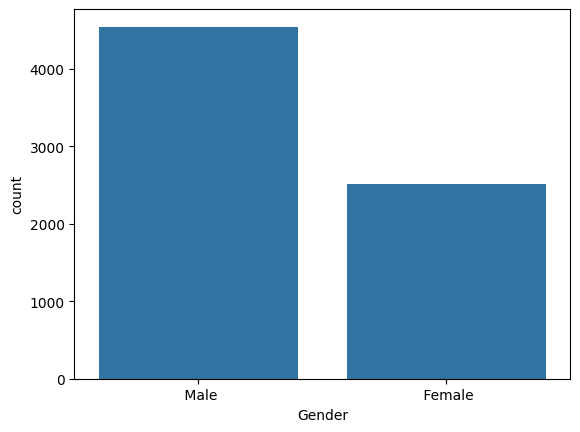

In [13]:
sns.countplot(data=data, x='Gender')
plt.show()

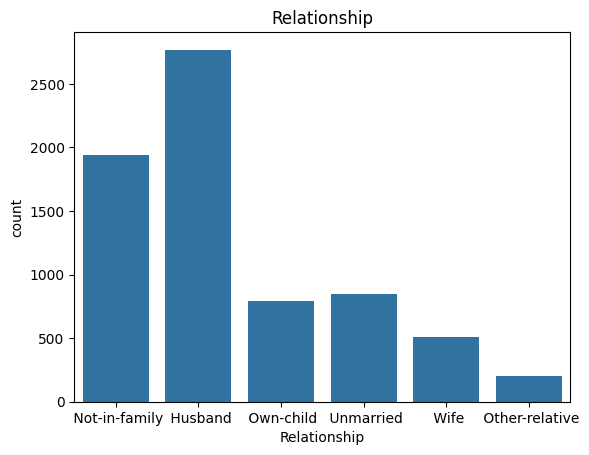

In [14]:
sns.countplot(data=data, x='Relationship')
plt.title('Relationship')
plt.show()

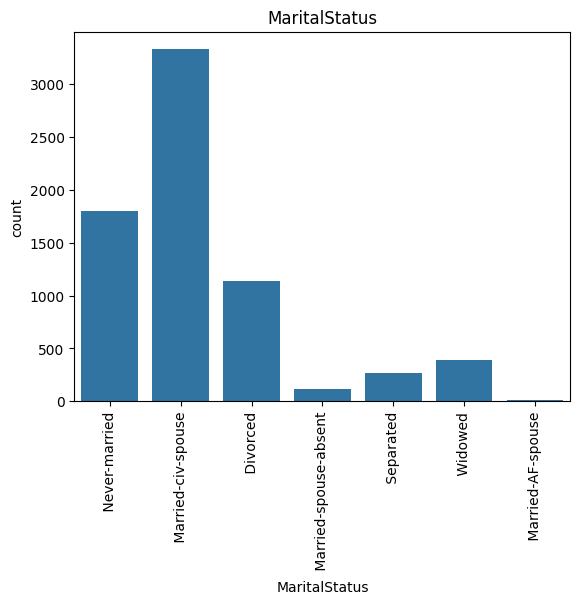

In [15]:
sns.countplot(data = data, x = 'MaritalStatus')
plt.title('MaritalStatus')
plt.xticks(rotation = 90)
plt.show()

Podemos observar que las variables **MaritalStatus** y **Relationship** se relacionan. Uno muestra el estado civil de la persona, ya sea casado, soltero, divorciado, etc. Mientras que otro nos muestra el rol que cumple dentro de la relación: esposo, esposa, hijo único, etc. Esta última información no nos es relevante de momento, por lo que eliminamos la columna **Relationship**. 

Para **MaritalStatus** notamos que tienen varios estados, pero no hay un orden natural visible entre ellos. Por eso mismo, se decidió utilizar OneHotEncoder.

Sin embargo, **Gender** es fácilmente clasificable entre fememino y masculino.

## **Preprocesamiento**

Convertir variables categóricas a númericas. 

- MaritalStatus
- Relationship
- Gender

In [592]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = ['Age', 'EducationNum', 'HoursPerWeek', 'CapitalGain']
num_col_outlier = ['CapitalGain']
cat_cols = ['MaritalStatus', 'Gender', 'Relationship']

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one')),
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop = 'first')),
])

ct = ColumnTransformer(
    [
        ('log', log_pipeline, num_col_outlier),
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

cluster1_data = ct.fit_transform(data)

cluster1_df = pd.DataFrame(
    cluster1_data,
    columns=ct.get_feature_names_out()
)

cluster1_df

,log__CapitalGain,num__Age,num__EducationNum,num__HoursPerWeek,num__CapitalGain,cat__MaritalStatus_ Married-AF-spouse,cat__MaritalStatus_ Married-civ-spouse,cat__MaritalStatus_ Married-spouse-absent,cat__MaritalStatus_ Never-married,cat__MaritalStatus_ Separated,cat__MaritalStatus_ Widowed,cat__Gender_ Male,cat__Relationship_ Not-in-family,cat__Relationship_ Other-relative,cat__Relationship_ Own-child,cat__Relationship_ Unmarried,cat__Relationship_ Wife
0,2.161573,-0.315390,0.852018,-0.032797,2.108768,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.417924,0.852018,-1.694790,-0.391832,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.551254,-0.537645,0.274979,-0.391832,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,-0.915374,0.852018,-0.032797,-0.391832,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,-1.248698,-0.537645,-0.340574,-0.391832,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7050,0.000000,0.084600,0.504602,0.459645,-0.391832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7051,0.000000,-0.315390,0.504602,-1.263903,-0.391832,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7052,2.078338,1.417898,1.546850,1.198308,1.883070,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7053,0.000000,-0.048730,-0.190229,-0.032797,-0.391832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [593]:
print("Dimensiones:", cluster1_df.shape)
print("Varianza media por columna:", cluster1_df.var().mean())


Dimensiones: (7055, 17)
Varianza media por columna: 0.34636948007294655


In [41]:
cluster1_df.std()

num__Age                                     1.000071
num__EducationNum                            1.000071
num__HoursPerWeek                            1.000071
log__CapitalGain                             3.073395
cat__MaritalStatus_ Married-AF-spouse        0.033657
cat__MaritalStatus_ Married-civ-spouse       0.499259
cat__MaritalStatus_ Married-spouse-absent    0.127178
cat__MaritalStatus_ Never-married            0.436288
cat__MaritalStatus_ Separated                0.191179
cat__MaritalStatus_ Widowed                  0.229642
cat__Gender_ Male                            0.478867
cat__Relationship_ Not-in-family             0.446751
cat__Relationship_ Other-relative            0.165979
cat__Relationship_ Own-child                 0.315535
cat__Relationship_ Unmarried                 0.324553
cat__Relationship_ Wife                      0.258516
dtype: float64

## **K-Means**

In [594]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=40)
kmeans.fit(cluster1_data)
labels = kmeans.labels_

# Calculo del silhouette 
silhouette_avg = silhouette_score(cluster1_data, labels)
print(f"Score de Silueta para k={k}: {silhouette_avg:.4f}")



Score de Silueta para k=3: 0.2198


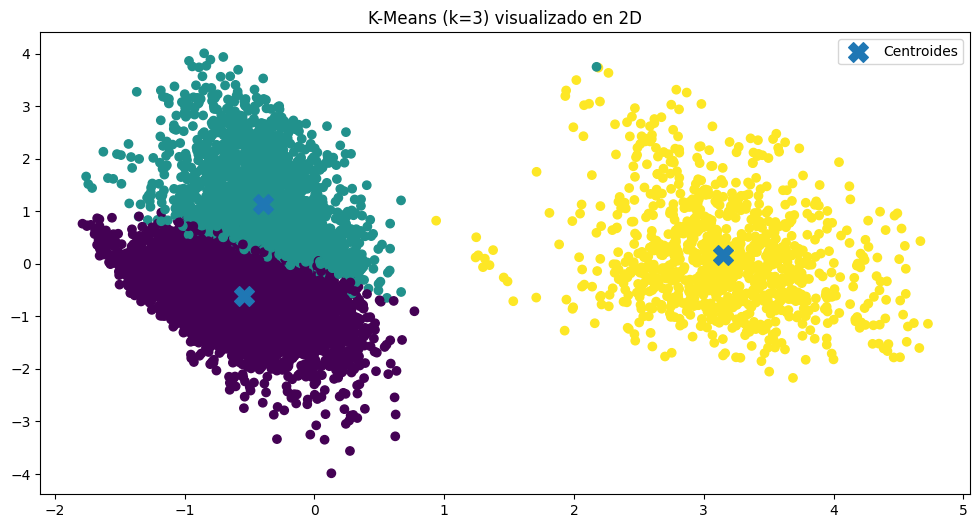

In [595]:
from sklearn.decomposition import PCA
# PCA a 2D para visualización
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(cluster1_data)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Graficar
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(X_pca[:,0], X_pca[:,1], c=labels) 
ax.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='X', s=200, label='Centroides')
ax.set_title(f"K-Means (k={k}) visualizado en 2D")
ax.legend()
plt.show()

**Prueba del Codo**

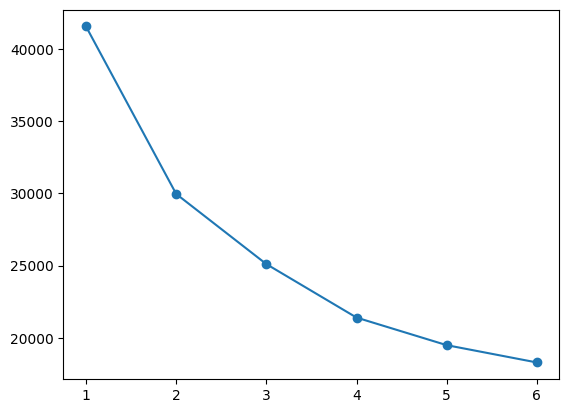

In [596]:
clusters_range = [1,2,3,4,5,6]
inertias = []
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, n_init=20).fit(cluster1_data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

## **Hierarchical Clustering**

### Single Linkage

In [576]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [577]:
X = cluster1_data

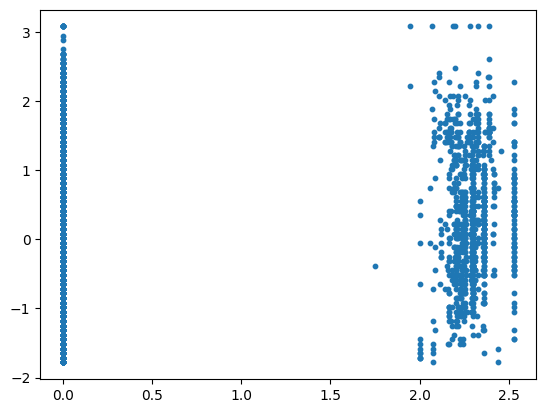

In [578]:
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.show()

In [579]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2, linkage="single", metric="euclidean").fit(X)

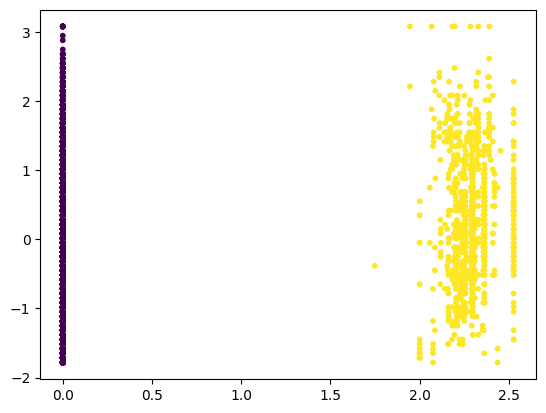

In [580]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], s=10, c=clustering.labels_)
plt.show()

## **DBSCAN**

In [585]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.1, min_samples=10)
labels_dbscan = dbscan.fit_predict(cluster1_df)

C:\Users\paola\AppData\Local\Temp\ipykernel_20464\4055169320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels_dbscan


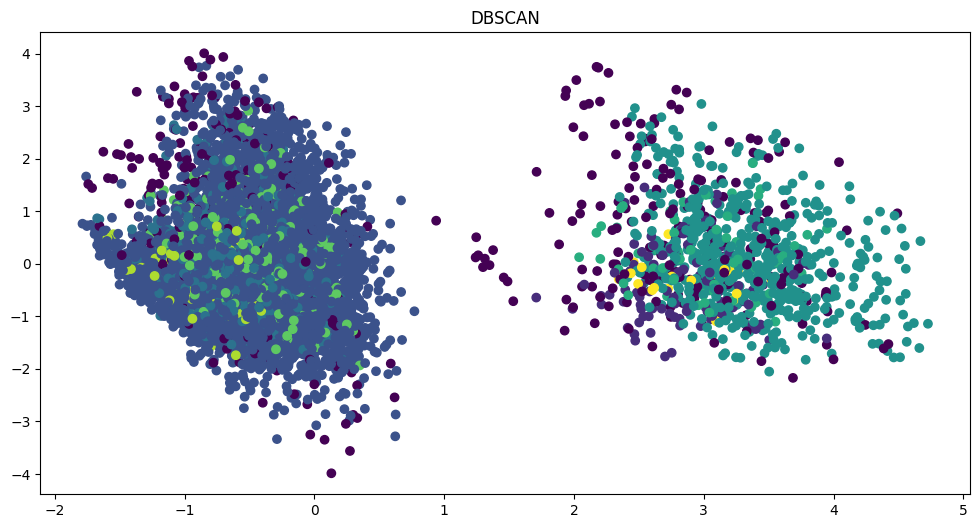

In [586]:
from sklearn.decomposition import PCA
data['Cluster'] = labels_dbscan

pca = PCA(n_components=10, random_state=42)
reduced = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(reduced[:, 0], reduced[:, 1], c=labels_dbscan)
ax.set_title("DBSCAN")
plt.show()

eps=0.30 -> Silhouette Score: 0.001
eps=0.40 -> Silhouette Score: -0.096
eps=0.50 -> Silhouette Score: -0.044
eps=0.60 -> Silhouette Score: -0.041
eps=0.70 -> Silhouette Score: -0.008
eps=0.80 -> Silhouette Score: -0.030
eps=0.90 -> Silhouette Score: -0.036
eps=1.00 -> Silhouette Score: 0.010
eps=1.10 -> Silhouette Score: -0.012
eps=1.20 -> Silhouette Score: 0.054
eps=1.30 -> Silhouette Score: 0.058
eps=1.40 -> Silhouette Score: 0.051
eps=1.50 -> Silhouette Score: 0.407
eps=1.60 -> Silhouette Score: 0.407
eps=1.70 -> Silhouette Score: 0.407
eps=1.80 -> Silhouette Score: 0.407
eps=1.90 -> Silhouette Score: 0.407
eps=2.00 -> Silhouette Score: 0.407


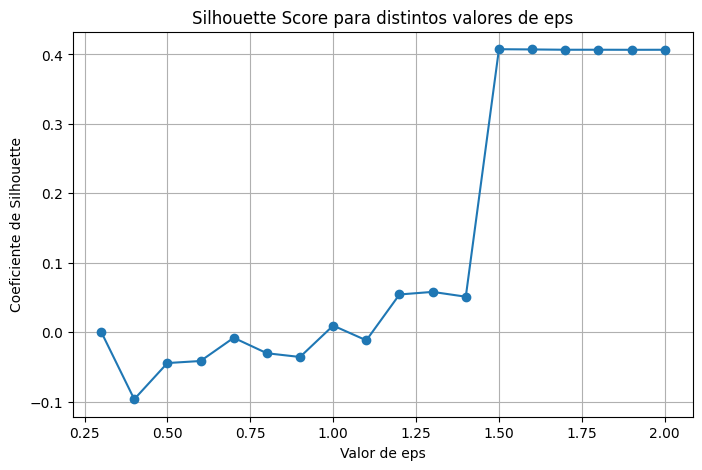

In [588]:
eps_values = np.arange(0.3, 2.1, 0.1)
min_samples = 4

silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(cluster1_df)

    mask = labels != -1
    labels_filtered = labels[mask]
    data_filtered = cluster1_df[mask]

    if len(set(labels_filtered)) > 1:
        sil_score = silhouette_score(data_filtered, labels_filtered)
        silhouette_scores.append(sil_score)
        print(f"eps={eps:.2f} -> Silhouette Score: {sil_score:.3f}")
    else:
        silhouette_scores.append(np.nan)
        print(f"eps={eps:.2f} -> No se pudo calcular (1 cluster o todo ruido)")

plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouette_scores, marker='o')
plt.title('Silhouette Score para distintos valores de eps')
plt.xlabel('Valor de eps')
plt.ylabel('Coeficiente de Silhouette')
plt.grid(True)
plt.show()


## **Gaussian Mixture Models**

In [30]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0, n_init=2, max_iter=200)
gmm.fit(cluster1_data)

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,200
,n_init,2
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,0


In [31]:
print("Component weights:")
print(gmm.weights_)
print("Means:")
print(gmm.means_)

Component weights:
[0.3102764  0.55067328 0.13905032]
Means:
[[-6.79046833e-01 -9.61143117e-02 -1.62910039e-01  0.00000000e+00
   0.00000000e+00  2.32983097e-02  4.75102787e-02  7.65646414e-01
   1.16948378e-01  0.00000000e+00  5.33576976e-01  4.36272270e-01
   7.53768844e-02  3.45363180e-01  1.42987666e-01  0.00000000e+00]
 [ 3.05340282e-01 -1.34361734e-02  5.22708098e-02  0.00000000e+00
   0.00000000e+00  6.73873874e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  8.77734878e-02  6.81338481e-01  2.07722008e-01
   0.00000000e+00  0.00000000e+00  1.18404118e-01  1.10939511e-01]
 [ 3.06000532e-01  2.67679676e-01  1.56511701e-01  8.65994653e+00
   8.15494393e-03  6.74821611e-01  1.22324159e-02  1.30479103e-01
   1.22324159e-02  5.40265036e-02  7.42099898e-01  1.84505607e-01
   3.56778797e-02  3.56778797e-02  7.23751274e-02  7.84913354e-02]]


In [32]:
print(gmm.covariances_)

[[[ 6.97911857e-01  8.92540917e-02  1.13621108e-01  0.00000000e+00
    0.00000000e+00 -2.06934762e-04  3.28701554e-02 -1.12024316e-01
    5.62640926e-02  0.00000000e+00 -2.48378756e-03  1.03561346e-01
   -8.80884859e-04 -1.37319885e-01  3.46394239e-02  0.00000000e+00]
  [ 8.92540917e-02  8.54774632e-01  1.35809286e-01  0.00000000e+00
    0.00000000e+00 -5.20820546e-03 -1.45593972e-03  3.31658588e-02
   -1.92594992e-02  0.00000000e+00 -1.72059144e-02  1.15586867e-01
   -2.18541040e-02 -6.77374124e-02 -2.59953502e-02  0.00000000e+00]
  [ 1.13621108e-01  1.35809286e-01  8.47732543e-01  0.00000000e+00
    0.00000000e+00  6.13058094e-04  5.08499207e-03 -2.14376099e-02
    8.18638030e-03  0.00000000e+00  6.30979924e-02  7.73204186e-02
   -9.93295934e-03 -6.28208361e-02 -4.56662315e-03  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e-06
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000

In [33]:
gmm.predict(cluster1_data)

array([2, 1, 1, ..., 2, 0, 2])

In [34]:
gmm.predict_proba(cluster1_data)

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.11461277e-30],
       [0.00000000e+00, 1.00000000e+00, 4.94927907e-30],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 8.85571534e-19],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [35]:
score = silhouette_score(cluster1_data, labels_gmm)
print(f"Silhouette Score: {score:.4f}")

NameError: name 'labels_gmm' is not defined

C:\Users\paola\AppData\Local\Temp\ipykernel_20464\2316926155.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=30)


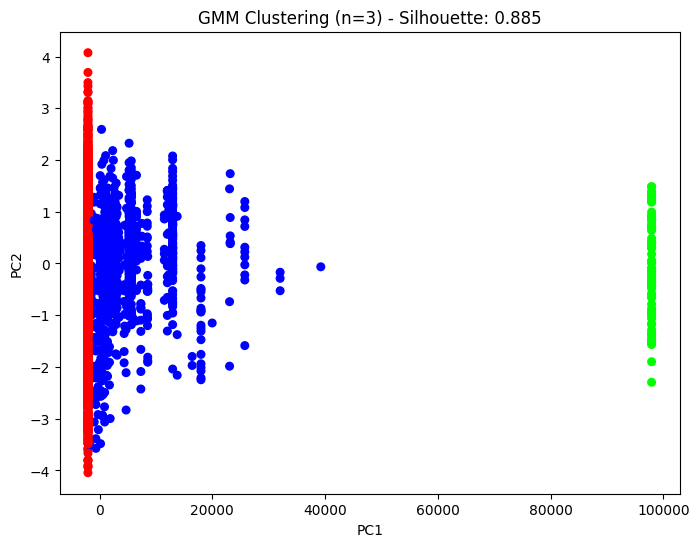

In [ ]:
from sklearn.decomposition import PCA

labels = gmm.predict_proba(cluster1_data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(cluster1_data)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=30)
plt.title(f"GMM Clustering (n={n_clusters}) - Silhouette: {score:.3f}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()